In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name
case = 'Straight Coast'

# path to ocean_annual file
path_year = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/30yr_KH/26500101.ocean_annual.nc'
dy = xr.open_dataset(path_year, decode_times=True)

# path to ocean_month file
path_month = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/30yr_KH/26500101.ocean_month.nc'
dm = xr.open_dataset(path_month, decode_times=True)

#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy['xh']==211)[0][0]
x_east = np.where(dy['xh']==351)[0][0]
y = np.where(dy['yq']==-35)[0][0]
y_south = np.where(dy['yq']==-71)[0][0]
y_north = np.where(dy['yq']==71)[0][0]

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:465: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [2]:
def calculate_basin_sfn(vmo, vhGM, x_west, x_east, y_south, y_north):
    vmo_slice = vmo.isel(time=slice(-31, -1)).mean(dim='time')
    vhGM_slice = vhGM.isel(time=slice(-31, -1)).mean(dim='time')
    sfn_basin_mean = (np.cumsum(np.nansum((vmo_slice[:,y_south:y_north,x_west:x_east])/1025, axis=2), axis=0))/(1e6)
    sfn_basin_res = (np.cumsum(np.nansum((vhGM_slice[:,y_south:y_north,x_west:x_east])/1025, axis=2), axis=0))/(1e6)
    sfn_basin_resmean = sfn_basin_mean + sfn_basin_res
    return sfn_basin_mean, sfn_basin_res, sfn_basin_resmean

sfn_small_mean, sfn_small_res, sfn_small_resmean = calculate_basin_sfn(dy['vmo'], dy['vhGM'], 
                                                                       x_west, x_east, y, y_north)
sfn_large_mean, sfn_large_res, sfn_large_resmean = calculate_basin_sfn(dy['vmo'], dy['vhGM'], 
                                                                       0, x_west, y, y_north)


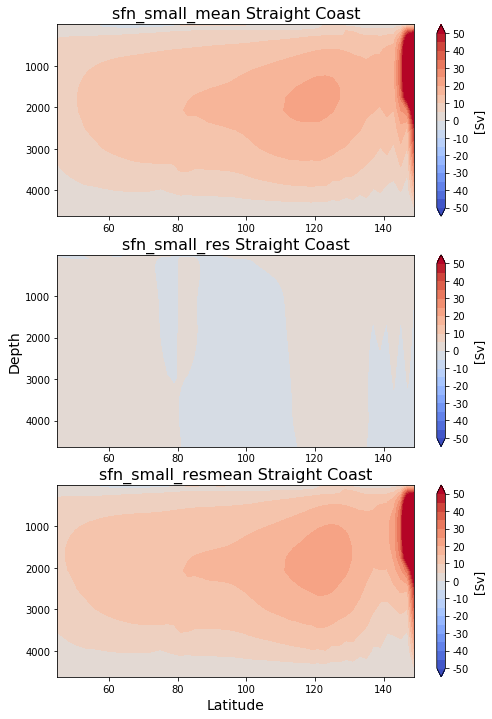

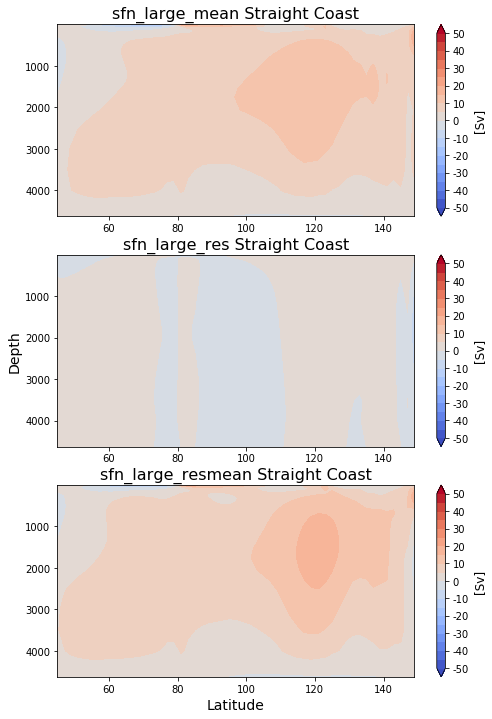

In [3]:
def variablename(*arg):
    names = []
    for i in range(len(arg)):
        item = [tpl[0] for tpl in filter(lambda x: arg[i] is x[1], globals().items())]
        names.append(item)
    str(names).strip('[]')
    return names

def plot_basin_sfn(sfn_mean, sfn_res, sfn_resmean, sfn_bound, y_south, y_north):
    t = np.linspace(-sfn_bound, sfn_bound, 11, endpoint=True)
    b = np.linspace(-sfn_bound, sfn_bound, 21, endpoint=True)
    fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,12))
    sfn_list = sfn_mean, sfn_res, sfn_resmean
    names = variablename(sfn_mean, sfn_res, sfn_resmean)
    for row in range(3):
        ax = axs[row]
        cf = ax.contourf(dy['xh'][y_south:y_north], dy['zl'], sfn_list[row][:,:], b, cmap='coolwarm', extend='both')
        ax.invert_yaxis()
        ax.set_xlim(dy['xh'][y_south], dy['xh'][y_north-1])
        ax.set_title('{}'.format(str(names[row]).strip("['']"))+' '+'{}'.format(case), fontsize=16)
        cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
        cbar.ax.set_ylabel('[Sv]', fontsize=12)
    axs[1].set_ylabel('Depth', fontsize=14), axs[2].set_xlabel('Latitude', fontsize=14)
    plt.show()
    return

plot_basin_sfn(sfn_small_mean, sfn_small_res, sfn_small_resmean, 50, y, y_north)
plot_basin_sfn(sfn_large_mean, sfn_large_res, sfn_large_resmean, 50, y, y_north)

In [7]:
t = np.linspace(-50, 50, 11, endpoint=True)
b = np.linspace(-50, 50, 21, endpoint=True)

fig, axs = plt.subplots(figsize=(8,12))
ch 
c = ax.contour(dy['xh'][y_south:y_north], dy['zl'], sfn_list[row][:,:], extend='both')
ax.invert_yaxis()
ax.set_xlim(dy['xh'][y_south], dy['xh'][y_north-1])
ax.set_title('{}'.format(str(names[row]).strip("['']"))+' '+'{}'.format(case), fontsize=16)
cbar = fig.colorbar(cf, ax=ax, ticks=t, format = '%.0f')
cbar.ax.set_ylabel('[Sv]', fontsize=12)
ax.set_ylabel('Depth', fontsize=14), axs[2].set_xlabel('Latitude', fontsize=14)
plt.show()

<xarray.DataArray 'vmo' (time: 100, zl: 31, yq: 81, xh: 180)>
[45198000 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * time     (time) object 2650-07-02 12:00:00 ... 2749-07-02 12:00:00
  * zl       (zl) float64 2.5 10.0 20.0 32.5 ... 3e+03 3.5e+03 4e+03 4.625e+03
  * yq       (yq) float64 -79.0 -77.0 -75.0 -73.0 -71.0 ... 75.0 77.0 79.0 81.0
Attributes:
    long_name:      Ocean Mass Y Transport
    units:          kg s-1
    cell_methods:   zl:sum yq:point xh:sum time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  ocean_mass_y_transport
    interp_method:  none